In [9]:
import numpy as np                 #loading in numpy
from matplotlib import pyplot as plt      #load matplotlib
import math                        # load math 
#this makes matplotlib plots appear in the notebook (instead of a separate window)
%matplotlib inline
%config InlineBackend.figure_formats = ['svg']

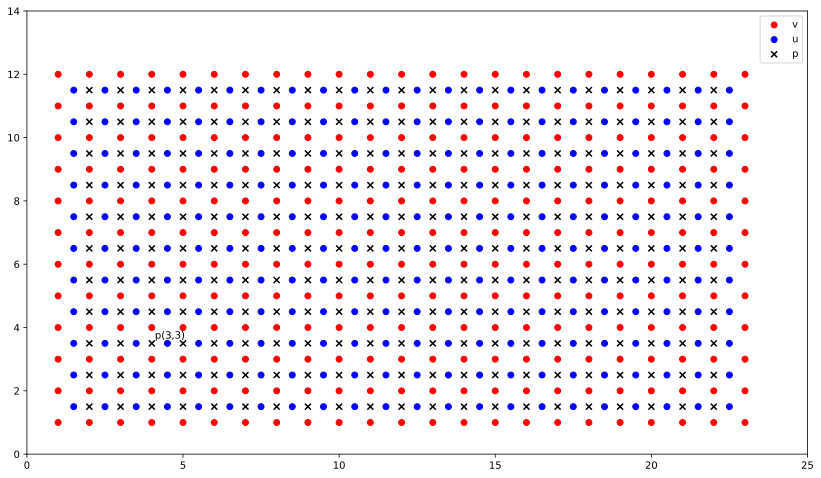

In [10]:
plt.figure(figsize=(14,8))
xvalues = np.linspace(1,23,23);
yvalues = np.linspace(1,12,12);
vx, vy = np.meshgrid(xvalues, yvalues)
fig = plt.scatter(vx, vy, marker='o', color='r',label='v')
xvalues = np.linspace(1,22,22)+0.5;
yvalues = np.linspace(1,11,11)+0.5;
vx, vy = np.meshgrid(xvalues, yvalues)
fig = plt.scatter(vx, vy, marker='o', color='b',label='u')
xvalues = np.linspace(1,21,21)+1;
yvalues = np.linspace(1,11,11)+0.5;
vx, vy = np.meshgrid(xvalues, yvalues)
fig = plt.scatter(vx, vy, marker='x', color='black',label='p')
plt.xlim([0,25])
plt.ylim([0,14])
plt.text(4.1,3.65,'p(3,3)')
plt.legend()

/home/guoqiang/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:37: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-k" (-> color='k'). The keyword argument will take precedence.
/home/guoqiang/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:39: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-k" (-> color='k'). The keyword argument will take precedence.


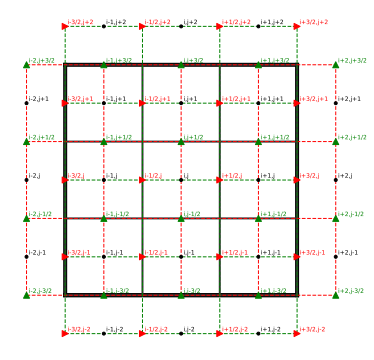

In [11]:
import math
from fractions import Fraction
import scipy.linalg
import scipy.sparse
import scipy.sparse.linalg
import numpy as np
import matplotlib.pyplot as plt
#
nx    = int(3)                       # number of mesh cells in x
ny    = int(3)                       # number of mesh cells in y
lx    = 5.*nx                        # domain length in x
ly    = 5.*ny                        # domain length in y
dx    = lx/(1.0*nx)                  # mesh spacing in x
dy    = ly/(1.0*ny)                  # mesh spacing in y
xp     = np.arange(dx/2.,lx+dx/2.,dx)
yp     = np.arange(dy/2.,ly+dy/2.,dy)
xu     = np.arange(dx   ,lx+dx   ,dx)
yu     = np.arange(dy/2.,ly+dy/2.,dy)
xv     = np.arange(dx/2.,lx+dx/2.,dx)
yv     = np.arange(dy   ,ly+dy   ,dy)
XP,YP = np.meshgrid(xp,yp)
XP = np.transpose(XP)
YP = np.transpose(YP)
XU,YU = np.meshgrid(xu,yu)
XU = np.transpose(XU)
YU = np.transpose(YU)
XV,YV = np.meshgrid(xv,yv)
XV = np.transpose(XV)
YV = np.transpose(YV)
#
plt.plot([0.,lx], [0.,0.], '-k', lw=4)
plt.plot([0.,0.], [0.,ly], '-k', lw=4)
plt.plot([0.,lx], [0.,0.], '-k', lw=4)
plt.plot([0.,lx], [ly,ly], '-k', lw=4)
plt.plot([lx,lx], [0.,ly], '-k', lw=4)
for i in range(0,nx+1):
    plt.plot([(i)*dx, (i)*dx],[0., ly],'-k',color='0.2',lw=2.0)
for j in range(0,ny+1):
    plt.plot([0., lx],[(j)*dy, (j)*dy],'-k',color='0.2',lw=2.0)
for i in range(0,nx+2):
    plt.plot([(i-0.5)*dx, (i-0.5)*dx],[0., ly],'--r',lw=1.0)
for j in range(0,ny+1):
    plt.plot([-dx/2., lx+dx/2.],[(j-0.0)*dy, (j-0.0)*dy],'--r',lw=1.0)
for i in range(0,nx+1):
    plt.plot([(i-0.0)*dx, (i-0.0)*dx],[-dy/2., ly+dy/2.],'--g',lw=1.0)
for j in range(0,ny+2):
    plt.plot([0., lx],[(j-0.5)*dy, (j-0.5)*dy],'--g',lw=1.0)
eps = 0.15
for i in range(0,nx+2):
    xp = (i-0.5)*dx
    xu = xp + dx/2.
    xv = xp
    for j in range(0,ny+2):
        yp = (j-0.5)*dy
        yv = yp + dy/2.
        yu = yp
        corner = False
        if(   i == 0    and j == 0    ): corner = True
        elif( i == 0    and j == ny+1 ): corner = True
        elif( i == nx+1 and j == 0    ): corner = True
        elif( i == nx+1 and j == ny+1 ): corner = True
        if(not corner): plt.plot([xp],[yp], '.k')
        if( i < nx+1 ): plt.plot([xu],[yu], '>r')
        if( j < ny+1 ): plt.plot([xv],[yv], '^g')
        x0p = (xp-lx/2)/dx
        y0p = (yp-ly/2)/dy
        x0u = (xu-lx/2)/dx
        y0u = (yu-ly/2)/dy
        x0v = (xv-lx/2)/dx
        y0v = (yv-ly/2)/dy
        sxp = int(np.sign(x0p))
        syp = int(np.sign(y0p))
        sxu = int(np.sign(x0u))
        syu = int(np.sign(y0u))
        sxv = int(np.sign(x0v))
        syv = int(np.sign(y0v))
        if(    sxp == 1.  ): fxp = '+'
        elif(  sxp == -1. ): fxp = '-'
        else:                fxp = ''
        if(    syp == 1.  ): fyp = '+'
        elif(  syp == -1. ): fyp = '-'
        else:                fyp = ''
        if(    sxu == 1.  ): fxu = '+'
        elif(  sxu == -1. ): fxu = '-'
        else:                fxu = ''
        if(    syu == 1.  ): fyu = '+'
        elif(  syu == -1. ): fyu = '-'
        else:                fyu = ''
        if(    sxv == 1.  ): fxv = '+'
        elif(  sxv == -1. ): fxv = '-'
        else:                fxv = ''
        if(    syv == 1.  ): fyv = '+'
        elif(  syv == -1. ): fyv = '-'
        else:                fyv = ''
        if(sxp != 0.): fxp += str(Fraction(abs(x0p)))
        if(syp != 0.): fyp += str(Fraction(abs(y0p)))
        if(sxu != 0.): fxu += str(Fraction(abs(x0u)))
        if(syu != 0.): fyu += str(Fraction(abs(y0u)))
        if(sxv != 0.): fxv += str(Fraction(abs(x0v)))
        if(syv != 0.): fyv += str(Fraction(abs(y0v)))
        if( not corner ): plt.text(xp+eps,yp+eps,'i'+fxp+','+'j'+fyp,fontsize=6,color='k')
        if(  i < nx+1  ): plt.text(xu+eps,yu+eps,'i'+fxu+','+'j'+fyu,fontsize=6,color='r')
        if(  j < ny+1  ): plt.text(xv+eps,yv+eps,'i'+fxv+','+'j'+fyv,fontsize=6,color='g')
        #if( not corner ): plt.text(xp+eps,yp+eps,r'$p_{'+'i'+fxp+','+'j'+fyp+'}$',fontsize=6,color='k')
        #if(  i < nx+1  ): plt.text(xu+eps,yu+eps,r'$u_{'+'i'+fxu+','+'j'+fyu+'}$',fontsize=6,color='r')
        #if(  j < ny+1  ): plt.text(xv+eps,yv+eps,r'$v_{'+'i'+fxv+','+'j'+fyv+'}$',fontsize=6,color='g')
epsx = dx/4.
plt.gca().set_xlim([-dx/2-epsx, lx+dx/2.+epsx])
epsy = dy/4.
plt.gca().set_ylim([-dy/2.-epsy, ly+dy/2.+epsy])
plt.gca().axis('off')
w, h = plt.figaspect(ly/lx)
plt.gcf().set_size_inches(w*1.3,h*1.3)
plt.show()